---
# **PROJETO 1** - IBM - RH - Análise de desempenho e atritos de funcionários
---

# **IBM HR Analytics Employee Attrition & Performance - Kaggle**
Este conjunto de dados foi criado pela equipe de cientistas de dados da IBM com o objetivo de ser usado de maneira educacional. Iremos criar uma variável chamada de turnover (rotatividade) para ser usada como variável dependente. Esta variável demonstra que o funcionário poderá sair da empresa.

# **Sobre este projeto:**
Os principais pontos que serão avaliados:
Levantamento de hipóteses
Manipulação de dados e criação de gráficos simples com o Pandas
Criar um modelo de classificação

# **Preparação do Ambiente:**
Para este projeto, acessem o link - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.\
Crie a variável *turnover* seguindo a orientação abaixo:

*   dados['turnover'] = dados.replace({'Attrition': {'Yes':1, 'No': 0}})



In [1]:
# Importando Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Implememtando os dados:
dados = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
dados

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
dados['turnover'] = dados[{'Attrition': {'Yes':1, 'No':0}}]
dados['turnover'][dados['turnover'] == 'Yes' ] = 1
dados['turnover'][dados['turnover'] == 'No' ] = 0
dados['turnover'] = np.array(dados['turnover'], dtype='int')
dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,0


In [4]:
dados['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [5]:
dados['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [6]:
dados['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [7]:
dados['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

Os atributos Over18, EmployeeCount, EmployeeNumber e StandardHours apresentam informações as quais julgo não serem importantes para a análise de correlação com o rótulo *turnover*. Desta forma, estes atributros serão retirados da tabela, para que não causem ruídos na análise.

In [8]:
df = dados.drop(['StandardHours', 'EmployeeNumber', 'EmployeeCount', 'Over18'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

**Exercicio 1. (2 pontos)**\
Realize uma análise sobre as variáveis independentes em relação a variável turnover. Quais ideias você obteve? Faça uma pequena apresentação de três a quatro gráficos e escreva suas percepções abaixo de cada um.

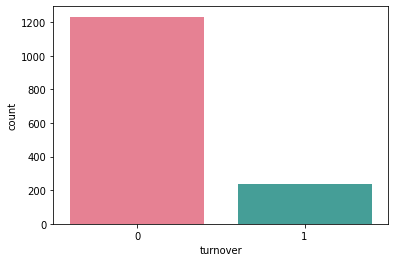

In [9]:
sns.countplot(x ='turnover', palette = "husl", data = df)

In [10]:
len(df[df['turnover']==0])/len(df['turnover'])

0.8387755102040816

In [11]:
len(df[df['turnover']==1])/len(df['turnover'])

0.16122448979591836

Neste gráfico pode-se avaliar o total de casos de atritos com funcionários. Os dados apresentados nos retornam que os casos de atritos ocorreram com 16,12% dos funcionários.  

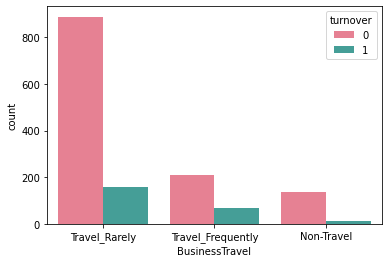

In [12]:
sns.countplot(x='BusinessTravel',palette = "husl", hue='turnover', data=df)

In [13]:
df1 = df[df['turnover']==1]
df1['BusinessTravel'].value_counts()

Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: BusinessTravel, dtype: int64

In [14]:
tr = len(df1[df1['BusinessTravel']=='Travel_Rarely'])/len(df[df['BusinessTravel']=='Travel_Rarely'])
tf = len(df1[df1['BusinessTravel']=='Travel_Frequently'])/len(df[df['BusinessTravel']=='Travel_Frequently'])
nt = len(df1[df1['BusinessTravel']=='Non-Travel'])/len(df[df['BusinessTravel']=='Non-Travel'])
print('tr = {:.4f} / tf = {:.4f} / nt = {:.4f}'.format(tr, tf, nt))

tr = 0.1496 / tf = 0.2491 / nt = 0.0800


Neste gráfico vemos a relação da variável BusinessTravel com o turnover. Podemos observar que proporcionalmente, os funcionários que viajam frequentemente obtiveram um índice de atrito maior.

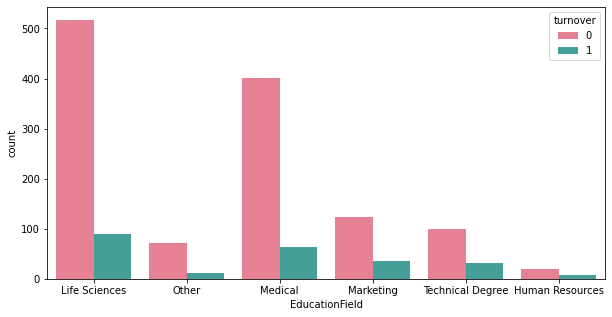

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField', hue='turnover', palette = "husl", data=df)

In [16]:
df2 = df[df['turnover']==1]
df2['EducationField'].value_counts()

Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64

In [17]:
ls = len(df1[df1['EducationField']=='Life Sciences'])/len(df[df['EducationField']=='Life Sciences'])
md = len(df1[df1['EducationField']=='Medical'])/len(df[df['EducationField']=='Medical'])
mk = len(df1[df1['EducationField']=='Marketing'])/len(df[df['EducationField']=='Marketing'])
td = len(df1[df1['EducationField']=='Technical Degree'])/len(df[df['EducationField']=='Technical Degree'])
ot = len(df1[df1['EducationField']=='Other'])/len(df[df['EducationField']=='Other'])
hr = len(df1[df1['EducationField']=='Human Resources'])/len(df[df['EducationField']=='Human Resources'])
print('ls = {:.4f} / md = {:.4f} / mk = {:.4f} / td = {:.4f} / ot = {:.4f} / hr = {:.4f}'.format(ls, md, mk, td, ot, hr))

ls = 0.1469 / md = 0.1358 / mk = 0.2201 / td = 0.2424 / ot = 0.1341 / hr = 0.2593


Neste gráfico vemos a relação da variável EducationField com o turnover. Podemos observar que proporcionalmente, os funcionários que têm formação na área de Recurso Humanos, apresentaram um índice de atrito maior, com uma pequena diferença dos profissionais com formação em Áreas Técnicas.

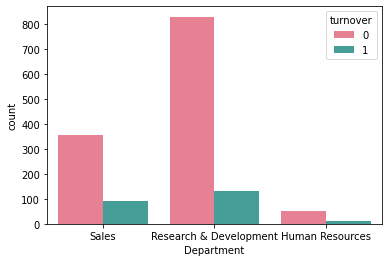

In [18]:
sns.countplot(x='Department', hue='turnover', palette = "husl", data=df)

In [19]:
df3 = df[df['turnover']==1]
df3['Department'].value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

In [20]:
rd = len(df1[df1['Department']=='Research & Development'])/len(df[df['Department']=='Research & Development'])
sl = len(df1[df1['Department']=='Sales'])/len(df[df['Department']=='Sales'])
hr = len(df1[df1['Department']=='Human Resources'])/len(df[df['Department']=='Human Resources'])
print('rd = {:.4f} / sl = {:.4f} / hr = {:.4f}'.format(rd, sl, hr))

rd = 0.1384 / sl = 0.2063 / hr = 0.1905


Neste gráfico vemos a relação da variável Department com o turnover. Podemos observar que proporcionalmente, os funcionários que trabalham no departamento de vendas obtiveram um índice de atrito maior, com uma pequena diferença do departamento de RH.

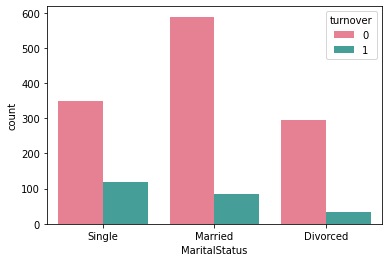

In [21]:
sns.countplot(x='MaritalStatus', hue='turnover', palette = "husl", data=df)

In [22]:
df4 = df[df['turnover']==1]
df4['MaritalStatus'].value_counts()

Single      120
Married      84
Divorced     33
Name: MaritalStatus, dtype: int64

In [23]:
sg = len(df1[df1['MaritalStatus']=='Single'])/len(df[df['MaritalStatus']=='Single'])
mr = len(df1[df1['MaritalStatus']=='Married'])/len(df[df['MaritalStatus']=='Married'])
dv = len(df1[df1['MaritalStatus']=='Divorced'])/len(df[df['MaritalStatus']=='Divorced'])
print('sg = {:.4f} / mr = {:.4f} / dv = {:.4f}'.format(sg, mr, dv))

sg = 0.2553 / mr = 0.1248 / dv = 0.1009


Neste gráfico vemos a relação da variável MaritalStatus com o turnover. Podemos observar que proporcionalmente, os funcionários que são solteiros obtiveram um índice de atrito maior.

**Exercicio 2. (1 ponto)**\
Faça seleção de características e selecione as 8 variáveis mais importantes. Escreva quais são elas e destaque as variáveis que estão presentes nas ideias apresentadas no exercício 1.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [25]:
# Transformando Variáveis Categóricas em Numéricas (binárias). Em alguns casos será utilizado a função get_dummies. 

# Variável Attrition:
df['Attrition'][df['Attrition'] == 'Yes' ] = 1
df['Attrition'][df['Attrition'] == 'No' ] = 0
df['Attrition'] = np.array(df['Attrition'], dtype='int')

# Variável BusinessTravel:
df_BusinessTravel = pd.get_dummies(df['BusinessTravel'])
df_BusinessTravel = df_BusinessTravel.rename(columns={1:'Non-Travel', 2:'Travel_Rarely', 3:'Travel_Frequently'})
# Retornando os dados de BusinessTravel ao dataframe original
df['Non_Travel'] = df_BusinessTravel['Non-Travel']
df['Travel_Rarely'] = df_BusinessTravel['Travel_Rarely']
df['Travel_Frequently'] = df_BusinessTravel['Travel_Frequently']
# Transformando os dados em inteiros
df['Non_Travel'] = np.array(df['Non_Travel'], dtype='int')
df['Travel_Rarely'] = np.array(df['Travel_Rarely'], dtype='int')
df['Travel_Frequently'] = np.array(df['Travel_Frequently'], dtype='int')
# Retirando a coluna original BusinessTravel do dataframe
df = df.drop(['BusinessTravel'], axis=1)

# Variável Department:
df_Department = pd.get_dummies(df['Department'])
df_Department = df_Department.rename(columns={1:'Research & Development', 2:'Sales', 3:'Human Resources'})
# Retornando os dados de Department ao dataframe original
df['Research_&_Development'] = df_Department['Research & Development']
df['Sales'] = df_Department['Sales']
df['Human_Resources_Dp'] = df_Department['Human Resources']
# Transformando os dados em inteiros
df['Research_&_Development'] = np.array(df['Research_&_Development'], dtype='int')
df['Sales'] = np.array(df['Sales'], dtype='int')
df['Human_Resources_Dp'] = np.array(df['Human_Resources_Dp'], dtype='int')
# Retirando a coluna original Department do dataframe
df = df.drop(['Department'], axis=1)

# Variável EducationField:
df_EducationField = pd.get_dummies(df['EducationField'])
df_EducationField = df_EducationField.rename(columns={1:'Life Sciences', 2:'Medical', 3:'Marketing', 4:'Technical Degree', 5:'Other', 6:'Human Resources'})
# Retornando os dados de EducationField ao dataframe original
df['Life_Sciences'] = df_EducationField['Life Sciences']
df['Medical'] = df_EducationField['Medical']
df['Marketing'] = df_EducationField['Marketing']
df['Technical_Degree'] = df_EducationField['Technical Degree']
df['Other'] = df_EducationField['Other']
df['Human_Resources_Ef'] = df_EducationField['Human Resources']
# Transformando os dados em inteiros
df['Life_Sciences'] = np.array(df['Life_Sciences'], dtype='int')
df['Medical'] = np.array(df['Medical'], dtype='int')
df['Marketing'] = np.array(df['Marketing'], dtype='int')
df['Technical_Degree'] = np.array(df['Technical_Degree'], dtype='int')
df['Other'] = np.array(df['Other'], dtype='int')
df['Human_Resources_Ef'] = np.array(df['Human_Resources_Ef'], dtype='int')
# Retirando a coluna original EducationField do dataframe
df = df.drop(['EducationField'], axis=1)

# Variável Gender:
df_Gender = pd.get_dummies(df['Gender'])
df_Gender = df_Gender.rename(columns={1:'Male', 2:'Female'})
# Retornando os dados de Gender ao dataframe original
df['Male'] = df_Gender['Male']
df['Female'] = df_Gender['Female']
# Transformando os dados em inteiros
df['Male'] = np.array(df['Male'], dtype='int')
df['Female'] = np.array(df['Female'], dtype='int')
# Retirando a coluna original Gender do dataframe
df = df.drop(['Gender'], axis=1)

# Variável JobRole:
df_JobRole = pd.get_dummies(df['JobRole'])
df_JobRole = df_JobRole.rename(columns={1:'Sales Executive', 2:'Research Scientist', 3:'Laboratory Technician', 4:'Manufacturing Director', 5:'Healthcare Representative', 6:'Manager', 7:'Sales Representative', 8:'Research Director', 9:'Human Resources'})
# Retornando os dados de JobRole ao dataframe original
df['Sales_Executive'] = df_JobRole['Sales Executive']
df['Research_Scientist'] = df_JobRole['Research Scientist']
df['Laboratory_Technician'] = df_JobRole['Laboratory Technician']
df['Manufacturing_Director'] = df_JobRole['Manufacturing Director']
df['Healthcare_Representative'] = df_JobRole['Healthcare Representative']
df['Manager'] = df_JobRole['Manager']
df['Sales_Representative'] = df_JobRole['Sales Representative']
df['Research_Director'] = df_JobRole['Research Director']
df['Human_Resources_Jr'] = df_JobRole['Human Resources']
# Transformando os dados em inteiros
df['Sales_Executive'] = np.array(df['Sales_Executive'], dtype='int')
df['Research_Scientist'] = np.array(df['Research_Scientist'], dtype='int')
df['Laboratory_Technician'] = np.array(df['Laboratory_Technician'], dtype='int')
df['Manufacturing_Director'] = np.array(df['Manufacturing_Director'], dtype='int')
df['Healthcare_Representative'] = np.array(df['Healthcare_Representative'], dtype='int')
df['Manager'] = np.array(df['Manager'], dtype='int')
df['Sales_Representative'] = np.array(df['Sales_Representative'], dtype='int')
df['Research_Director'] = np.array(df['Research_Director'], dtype='int')
df['Human_Resources_Jr'] = np.array(df['Human_Resources_Jr'], dtype='int')
# Retirando a coluna original JobRole do dataframe
df = df.drop(['JobRole'], axis=1)

# Variável MaritalStatus:
df_MaritalStatus = pd.get_dummies(df['MaritalStatus'])
df_MaritalStatus = df_MaritalStatus.rename(columns={1:'Married', 2:'Single', 3:'Divorced'})
# Retornando os dados de MaritalStatus ao dataframe original
df['Married'] = df_MaritalStatus['Married']
df['Single'] = df_MaritalStatus['Single']
df['Divorced'] = df_MaritalStatus['Divorced']
# Transformando os dados em inteiros
df['Married'] = np.array(df['Married'], dtype='int')
df['Single'] = np.array(df['Single'], dtype='int')
df['Divorced'] = np.array(df['Divorced'], dtype='int')
# Retirando a coluna original MaritalStatus do dataframe
df = df.drop(['MaritalStatus'], axis=1)

# Variável OverTime:
df['OverTime'][df['OverTime'] == 'No' ] = 0
df['OverTime'][df['OverTime'] == 'Yes' ] = 1
df['OverTime'] = np.array(df['OverTime'], dtype='int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1470 non-null   int64
 1   Attrition                  1470 non-null   int64
 2   DailyRate                  1470 non-null   int64
 3   DistanceFromHome           1470 non-null   int64
 4   Education                  1470 non-null   int64
 5   EnvironmentSatisfaction    1470 non-null   int64
 6   HourlyRate                 1470 non-null   int64
 7   JobInvolvement             1470 non-null   int64
 8   JobLevel                   1470 non-null   int64
 9   JobSatisfaction            1470 non-null   int64
 10  MonthlyIncome              1470 non-null   int64
 11  MonthlyRate                1470 non-null   int64
 12  NumCompaniesWorked         1470 non-null   int64
 13  OverTime                   1470 non-null   int64
 14  PercentSalaryHike       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: S

In [26]:
# Analisando a correlação entre os atributos e o rótulo utilizando a RFE
X = df.drop(['turnover', 'Attrition'], axis=1)
y = df.turnover
X_std = StandardScaler().fit_transform(X)

estimator = LinearRegression()

selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X_std, y)

df5 = selector.get_feature_names_out()

df6 = pd.DataFrame(X.columns)
df6 = df6.rename(columns = {0:'Nome_Colunas'})
var = []
for i in range(8):
  num = str(df5[i])
  div = int(num[1]+num[2])
  nome = df6['Nome_Colunas'][div]
  var.append(nome)
print('As 8 variáveis mais importantes segundo o método RFE, parametrizado por Regressão Linear, são\n{}, {}, {}, {}, {}, {}, {}, {}.'.format(var[0], var[1], var[2], var[3], var[4], var[5], var[6], var[7]))

As 8 variáveis mais importantes segundo o método RFE, parametrizado por Regressão Linear, são
Non_Travel, Travel_Rarely, Travel_Frequently, Life_Sciences, Medical, Married, Single, Divorced.


A variável BusinessTravel foi abordada inicialmente e foi constatado que os atritos ocorreram com maior proporção com os funcionários que viajam frequentemente. A análise RFE ainda retorna que as demais situações de viagem também têm importância quando se trata do rótulo *turnover*.\
A variável EducationField também foi abordada. Na análise inicial do gráfico, observou-se que as áreas de formação em Recursos Humanos e Áreas Técnicas representavam os maiores índices de atritos, porém o modelo RFE apresenta como importantes as formações em áreas Médicas e Ciências da Vida.\
Outro ponto a ser dicutido é a situação do estado civil do funcionário. Na análise feita pelo gráfico observou-se que os funcionários solteiros apresentaram maior índice de atritos, e o modelo RFE nos apresenta que os demais estados civis também têm relevância comparado ao rótulo.

**Exercicio 3. (2 pontos)**\
Construa um modelo de árvore de decisão. Obtenha os valores das métricas: acurácia, precisão e sensitividade.

In [27]:
# Separando X e y
X = df.drop(['turnover', 'Attrition'], axis=1)
y = df.turnover

# Separar o dado em conjunto em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

#Implementando a Ávore de Decisão com poda em 4 níveis
arvore = DecisionTreeClassifier(max_depth= 4)
arvore.fit( X_train, y_train )
predicao = arvore.predict( X_test )

In [28]:
print(f'ACURÁCIA {accuracy_score(y_test, predicao)*100:.2f}%')
print(f'PRECISÃO {precision_score(y_test, predicao)*100:.2f}%')
print(f'SENSITIVIDADE {recall_score(y_test, predicao)*100:.2f}%')

ACURÁCIA 86.73%
PRECISÃO 80.77%
SENSITIVIDADE 38.18%


Para o modelo de Árvore de Decisão, foi utilizado poda com 4 níveis, pois desta maneira obteve-se melhores valores das métricas.

**Exercicio 4. (1 ponto)**\
Faça a representação da árvore e observe como foi realizado cada ramificação. Explique o que é GINI e quais seriam as desvantagens?

[Text(0.5, 0.9, 'OverTime <= 0.5\ngini = 0.262\nsamples = 1176\nvalue = [994, 182]\nclass = t'),
 Text(0.25, 0.7, 'TotalWorkingYears <= 2.5\ngini = 0.187\nsamples = 843\nvalue = [755, 88]\nclass = t'),
 Text(0.125, 0.5, 'Research_Scientist <= 0.5\ngini = 0.432\nsamples = 73\nvalue = [50, 23]\nclass = t'),
 Text(0.0625, 0.3, 'DailyRate <= 343.5\ngini = 0.494\nsamples = 47\nvalue = [26, 21]\nclass = t'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = u'),
 Text(0.09375, 0.1, 'gini = 0.464\nsamples = 41\nvalue = [26, 15]\nclass = t'),
 Text(0.1875, 0.3, 'Other <= 0.5\ngini = 0.142\nsamples = 26\nvalue = [24, 2]\nclass = t'),
 Text(0.15625, 0.1, 'gini = 0.077\nsamples = 25\nvalue = [24, 1]\nclass = t'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = u'),
 Text(0.375, 0.5, 'WorkLifeBalance <= 1.5\ngini = 0.155\nsamples = 770\nvalue = [705, 65]\nclass = t'),
 Text(0.3125, 0.3, 'DailyRate <= 936.0\ngini = 0.375\nsamples = 44\nvalue = [33, 11]\ncla

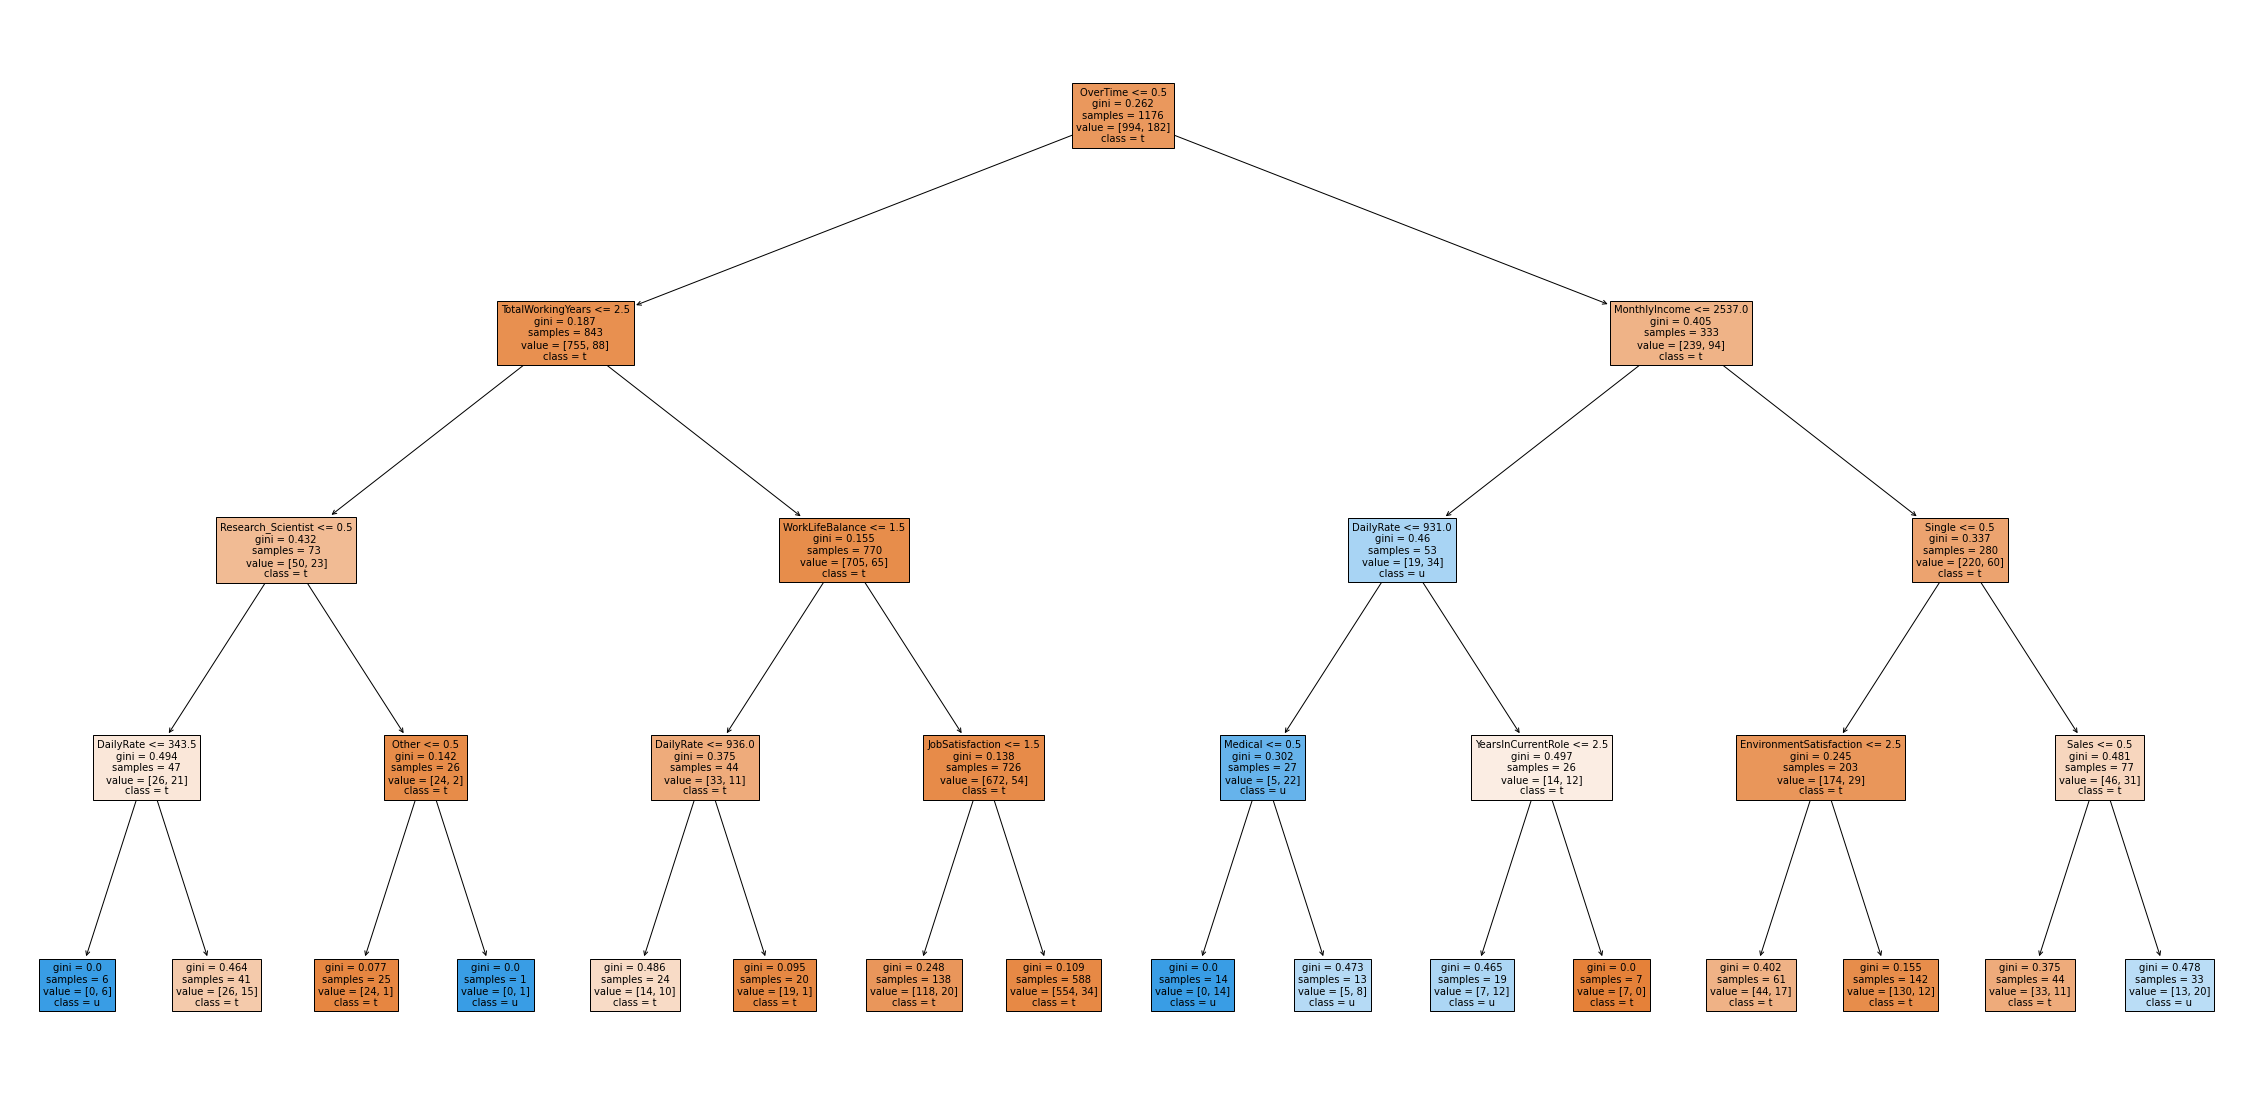

In [29]:
plt.figure( figsize=(40, 20) )
feature_names = X.columns
target_names = ('turnover')
plot_tree( arvore, filled=True, fontsize=10, class_names= target_names, feature_names= feature_names )

### **Índice Gini:**
O índice Gini foi criado pelo estatístico italiano Conrado Gini em 1912. Inicialmente foi desenvolvido para medir desigualdade de distribuição de renda.\
No caso de análise de dados, utiliza-se o índice Gini para medir o grau de heterogeneidade dos dados. No caso da utilização do modelo de classificação de Árvore de Decisão, mede-se o grau de impureza de um nó.\
Quando o Gini é igual a zero, diz-se que o nó é puro, ou seja, obtem-se a folha a qual representa uma classificação específica. Quando o Gini é maior que zero, diz-se que o nó possui um determinado grau de impureza, o que implica a necessidade de uma nova divisão para se obter um grau de impureza menor. Já quando o Gini é igual a um, temos um nó impuro.
### **Desvantagem:**
Quando utiliza-se o modelo de Árvore de Decisão, que é um modelo recursivo, estende-se a profundidade da classificação até o modelo classificar perfeitamente os dados de treinamento. Em um conjunto de treinamento sem ruídos, o número de erros pode ser zero, já quando existe ruído ou o conjunto de treinamento não é representativo, o algoritmo pode produzir árvores com *overfitting*.

Fonte: https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF


**Exercicio 5. (3 pontos)**\
Chamamos de overfitting (superajuste) a situação onde um modelo "decora" como predizer o conjunto de treino, mas tende a errar muito ao predizer o conjunto de teste. Dizemos que este modelo não generaliza, não consegue lidar com dados novos. Vimos dois modelos de diferentes estrategias de aprendizado por agrupamento durante as aulas. Qual destes modelos tem maior chance de sofrer um overfitting e por quê?

O principal objetivo de usar um modelo ensemble é agrupar um conjunto de modelos fracos e formar um modelo forte. A forma como isso é feito é definida pelas técnicas de Bagging e Boosting que funcionam de forma diferente e têm como objetivo obter melhores resultados com alta precisão e exatidão e menos erros. Com métodos de conjunto, vários modelos são reunidos para produzir um modelo poderoso.

*   Bagging é um modelo homogêneo de modelos fracos que aprende uns com os outros independentemente em paralelo e os combina para determinar a média do modelo.
*   Boosting também é um modelo homogêneo de modelos fracos, mas funciona de forma diferente do Bagging. Neste modelo, os modelos aprendem sequencialmente e de forma adaptativa para melhorar as previsões do modelo de aprendizagem.

Alguns dos fatores que causam erros no aprendizado são ruído, viés e variância. O método ensemble é aplicado para reduzir esses fatores resultando na estabilidade e precisão do resultado.\
O Bagging é usado para diminuir a variância no modelo de previsão, não o viés, e resolve problemas de *overfitting* em um modelo. Já o Boosting diminui o viés, não a variância, e cria modelos preditivos fortes.\
Desta forma, conclui-se que o modelo de Boosting é mais suscetível a sofre com *overfitting*.

Fonte: https://www.upgrad.com/blog/bagging-vs-boosting/#:~:text=Bagging%20is%20a%20technique%20for,based%20on%20the%20previous%20classification.

**Exercicio 6. (1 ponto)**\
Você recomendaria o seu modelo para uma empresa utilizar em seu setor de Recursos Humanos? Como você explicaria para um setor que não possui conhecimento algum sobre Ciência de Dados que um modelo com 100% de acurácia é impossível de se obter?

###Recomendação do modelo:
Para se analisar se um modelo de predição é bom ou não, devemos realizar a avaliação de suas métricas. Neste caso, as métricas calculadas foram a Acurácia, Precisão e Sensibilidade.\
A Acurária de um modelo avalia o percentual de acertos que o modelo obteve. Neste nosso caso, atingiu-se o valor de 86,73% de acertos.\
Se fossemos apenas avaliar esta métrica, poderíamos dizer que obtivemos um bom modelo, porém, é necessário a avaliação de mais métricas para chegarmos em alguma conclusão.\
Além da Acurácia, foi calculado também a métrica de Precisão a qual avalia os resultados verdadeiros positivos sobre a soma de todos os valores positivos (inclusive os falsos positivos). Para este modelo, a precisão obtida foi de 80,77%, indicando assim a existência de resultados preditos como positivos, porém na verdade eram negativos.\
Finalizamos a análise avaliando a métrica de Sensibilidade. Esta métrica avalia a capacidade do modelo de detectar com sucesso resultados classificados como positivos, ou seja, Sensibilidade alta significa altos valores de verdadeiros positivos, mesmo comparando com os posíveis falsos positivos.\
Desta maneira, como obtivemos um valor de 38,18% de Sensibilidade, o que significa que o modelo não detecta com sucesso satisfatório os resultados classificados como positivos, não se recomenda o uso deste modelo.

###Explicação 100% de Acurácia:
Como explicado acima, a Acurácia avalia a relação entre o total de acertos e o total de itens avaliados pelo modelo. Um resultado de 100% de Acurácia, significa que o modelo acertou todos os itens avaliados.\
Partindo do princípio de que os modelos de classificação são construídos através da avaliação de ocorrências passadas com o objetivo de prever a classificação de novos dados, quando atingi-se uma Acurácia de 100%, estamos diante de um modelo com *overfitting*, ou seja, o modelo fica superajustado para a base de treino utilizada (ocorrências passadas), e quando realiza as predições com os novos dados, acaba gerando predições com erros.\
Modelos que possuem Acurácia em bons níveis, apresentam percentual de erros o que signifca que são modelos abrangentes e que conseguem ter bons resultados de predição com os novos dados avaliados. 